In [108]:
import json
import keras
import tensorflow_probability as tfp
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import sparse
from keras import callbacks
import pickle
import glob
import math
import random

# Popularity bias

In [109]:
def plot_playists_popularity(playists): #FUNCTION THAT PLOTS AL THE SONGS APPEARANCES OF ALL PLAYLISTS
    #playlists is a list of lists

    num_appearances = {} #Dictionary to store the number of times a song is in a playlist

    for playlist in playists:
        for song in playlist:
            if song in num_appearances.keys():
                num_appearances[song] += 1
            else:
                num_appearances[song] = 1

    id, counts = zip(*num_appearances.items())
    plt.scatter(id, counts)
    plt.xlabel("Song number")
    plt.ylabel("Number of appearances")
    plt.show() #BREAK POINT HERE TO SEE THE PLOT
    return num_appearances

In [110]:
def order_playists(playlists):
    for playlist in playlists:
        playlist.sort()
    return playlists

In [111]:
def create_pairs(playlists, size): #playlists should be a list of lists, ordered
    pairs = np.zeros((size,size))
    for playlist in playlists:
        p_size = len(playlist)
        for i in range(p_size-1):
            pairs[playlist[i]][playlist[i+1]] += 1
        #pairs[playlist[p_size - 1]][playlist[p_size - 1]+1] += 1
    return pairs

In [112]:
def create_training_data(pairs):
    songs = []
    next = []
    for i in range(len(pairs)):
        songs.append(i)
        pred_song = np.argmax(pairs[i])
        if i > 0 and pred_song == 0:
            num = random.randint(i+1, len(pairs))
            next.append(num)
        else: next.append(pred_song)
        #next.append(pred_song)
    d = {"Song":songs, "Next":next}
    df = pd.DataFrame(d)
    return df

In [113]:
playlists = []
total_number_of_songs = 0

for f in glob.glob('*.json'):
    print(f)
    file = json.load(open(f))
    for p in file['playlists']:
        playlist = []
        for track in p['tracks']:
            playlist.append(track['artist_name'] + " - " + track['track_name'])
            total_number_of_songs += 1
        playlists.append(playlist)

mpd.slice.16000-16999.json
mpd.slice.17000-17999.json


In [114]:
freq_dict = {}
for p in playlists:
  for t in p:
    if t in freq_dict.keys():
      freq_dict[t] +=1
    else:
      freq_dict[t] = 1

In [115]:
popularity_dict = {}
for t in freq_dict.keys():
  popularity_dict[t] = freq_dict[t] / total_number_of_songs

In [116]:
sorted_dict = sorted(popularity_dict.items(), key=lambda item: item[1], reverse=True)

In [117]:
i = 0
tokenized_sorted = {}
for t in sorted_dict:
  if t[0] not in tokenized_sorted.keys():
    tokenized_sorted[t[0]] = i
    i += 1

In [118]:
playlists_tokenized = []

for p in playlists:
  playlist = []
  for t in p:
    playlist.append(tokenized_sorted[t])
  #sort playlist
  playlists_tokenized.append(sorted(playlist))

In [119]:
def create_df(playlists, size):
	songs = []
	next = []
	i = 0
	song = 0
	
	while song < size:
		pairs = np.zeros(size)
		songs.append(song)
		for playlist in playlists:
			while playlist[i] < song and i < len(playlist) - 1:
				i += 1
			if i < len(playlist) - 1 and playlist[i] == song:
				pairs[playlist[i+1]] += 1
			i = 0
		next.append(np.argmax(pairs))
		song += 1
	d = {"Song":songs, "Next":next}
	df = pd.DataFrame(d)
	return df

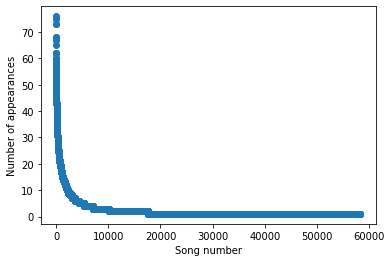

In [120]:
popularity = plot_playists_popularity(playlists_tokenized)
#playlists_ordered = order_playists(playlists_tokenized)
pairs = create_pairs(playlists_tokenized, len(popularity))
df = create_training_data(pairs)
#df2 = create_df(playlists_tokenized, len(popularity))

In [121]:
df

,Song,Next
0,0,9
1,1,2
2,2,6
3,3,5
4,4,7
...,...,...
58285,58285,58286
58286,58286,58287
58287,58287,58288
58288,58288,58289


In [122]:
#df2['Next'][168068] = 168067
#df2

In [123]:
#with open('dataframe_spotify.pickle', 'wb') as f:
    #pickle.dump(df2, f)

In [124]:
#with open('dataframe_spotify.pickle') as f:
 #   df2 = pickle.load(f)

In [125]:
n_steps = 1
n_features = 1

In [126]:
test = {}
for t in freq_dict:
    test[tokenized_sorted[t]] = freq_dict[t]

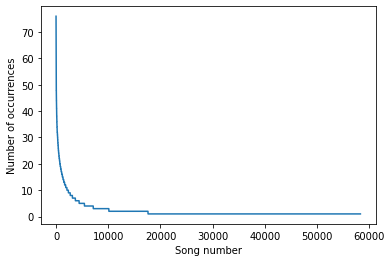

In [127]:
lists = sorted(test.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.ylabel('Number of occurrences')
plt.xlabel('Song number')
plt.show()

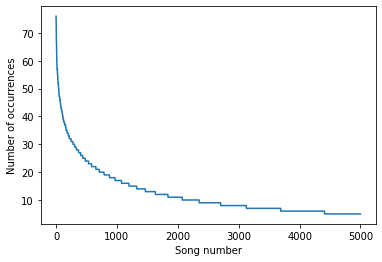

In [128]:
lists = sorted(test.items())[:5000]
x, y = zip(*lists)
plt.plot(x, y)
plt.ylabel('Number of occurrences')
plt.xlabel('Song number')
plt.show()

In [129]:
def remove_zeros(df):
    df_size = len(df)
    for i in range(df_size):
        if df['Song'][i] > 0 and df['Next'][i] < df['Song'][i]:
            next_song = random.randint(df['Song'][i], df_size - 1)
            df['Next'][i] = next_song
    return df


In [130]:
#df3 = remove_zeros(df2)

In [131]:
X = df['Song'].to_numpy()
y = df['Next'].to_numpy()
y

array([    9,     2,     6, ..., 58288, 58289, 58290], dtype=int64)

In [132]:
everything = list(zip(X, y))

random.shuffle(everything)

X_list, y_list = zip(*everything)

X_list = np.array(X_list)
y_list = np.array(y_list)

In [133]:
y_list

array([24432, 41662, 13428, ..., 31171, 44060, 20417], dtype=int64)

In [134]:
for i in range(9000, 11000):
    #print(y[i])
    if y[i] < 9000:
        print(i, " ", y[i])

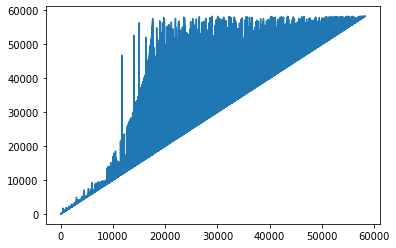

In [135]:
plt.plot(y)
#plt.plot(X)
plt.show()

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
#X_train, X_test, y_train, y_test = train_test_split(df["Song"], df["Next"], test_size=0.20, random_state=42)

In [137]:
mean = df['Next'].mean()
std = df['Next'].std()

In [138]:
def make_model(input_fts):
    model = tf.keras.Sequential()
    model.add(keras.layers.Dense(2, input_dim=input_fts))
    #model.add(keras.layers.Dense(8, input_dim = input_fts))
    #model.add(keras.layers.Dense(2, input_dim = 8))
    return model

In [139]:
def train_model(X, y):
    """Builds the model, trains it on the given data, and returns the trained model and history."""
    
    # Normalize y to have zero mean and unit variance
    y = y - mean
    y = y / std
    
    num_features = 1
    model = make_model(num_features)
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2,
                                         clipvalue=1,
                                         decay=1e-3)
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics = [keras.metrics.RootMeanSquaredError(),
                            keras.metrics.MeanAbsoluteError(),
                            keras.metrics.MeanAbsolutePercentageError(),
                            keras.metrics.MeanSquaredLogarithmicError(),
                            keras.metrics.CosineSimilarity(),
                            keras.metrics.LogCoshError()])

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(X, y,
                        epochs=100,
                        validation_split=0.2,
                        verbose=False,
                        #batch_size=100,
                        #validation_data=(x_test, Y_test),
                        callbacks=[callback])
    
    return model, history

In [140]:
def predict(model, X):
    
    predictions = model.predict(X)
    
    # Scale up means
    means = predictions[:, 0] * std + mean
    # Exponentiate and scale up log standard deviation
    stds = np.exp(predictions[:, 1]) * std
    
    return means, stds

In [141]:
reg_model, hist = train_model(X_list, y_list)

In [142]:
#pickle.dump(reg_model, open('model.pkl', 'wb'))

In [143]:
total = len(hist.history['loss'])
total -= 1

In [144]:
print(hist.history['loss'][total])
print(hist.history['root_mean_squared_error'][total])
print(hist.history['mean_absolute_error'][total])
print(hist.history['mean_absolute_percentage_error'][total])
print(hist.history['mean_squared_logarithmic_error'][total])
print(hist.history['cosine_similarity'][total])
print(hist.history['logcosh'][total])

1.6814463138580322
1.296705961227417
0.9991949796676636
840.6807250976562
0.18121516704559326
0.5898233652114868
0.5468829870223999


In [145]:
print(hist.history['val_loss'][total])
print(hist.history['val_root_mean_squared_error'][total])
print(hist.history['val_mean_absolute_error'][total])
print(hist.history['val_mean_absolute_percentage_error'][total])
print(hist.history['val_mean_squared_logarithmic_error'][total])
print(hist.history['val_cosine_similarity'][total])
print(hist.history['val_logcosh'][total])

0.35130175948143005
0.5927071571350098
0.49825525283813477
284.8175964355469
0.0390850231051445
0.9630483388900757
0.15477322041988373


Final train loss: 1.6814463138580322


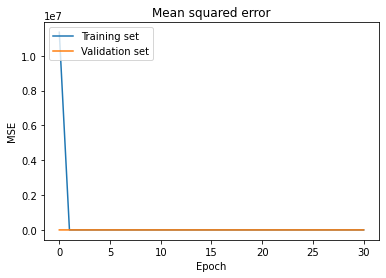

In [146]:
print("Final train loss:", hist.history["loss"][-1])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Mean squared error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

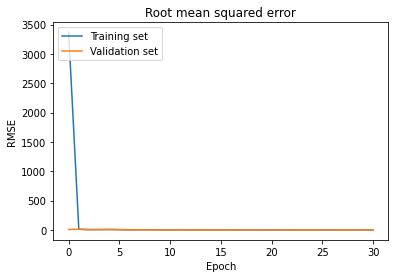

In [147]:
plt.plot(hist.history['root_mean_squared_error'])
plt.plot(hist.history['val_root_mean_squared_error'])
plt.title('Root mean squared error')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

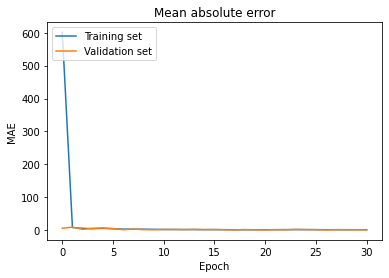

In [148]:
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

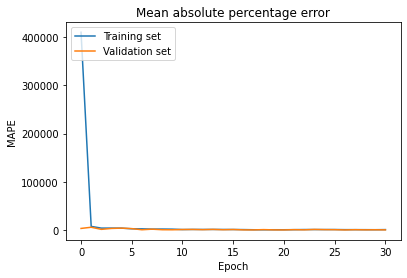

In [149]:
plt.plot(hist.history['mean_absolute_percentage_error'])
plt.plot(hist.history['val_mean_absolute_percentage_error'])
plt.title('Mean absolute percentage error')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

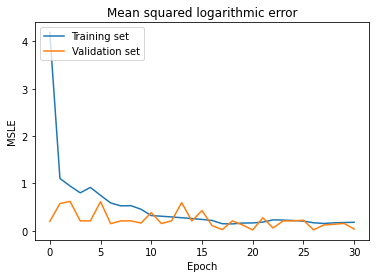

In [150]:
plt.plot(hist.history['mean_squared_logarithmic_error'])
plt.plot(hist.history['val_mean_squared_logarithmic_error'])
plt.title('Mean squared logarithmic error')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

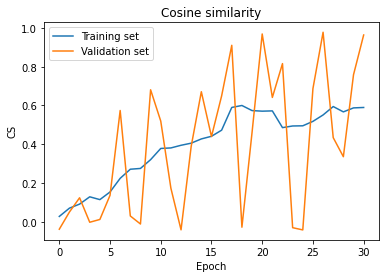

In [151]:
plt.plot(hist.history['cosine_similarity'])
plt.plot(hist.history['val_cosine_similarity'])
plt.title('Cosine similarity')
plt.ylabel('CS')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

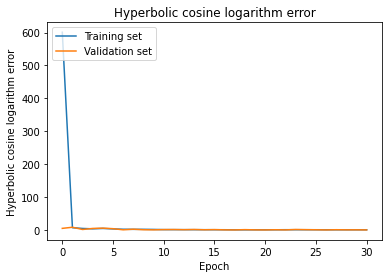

In [152]:
plt.plot(hist.history['logcosh'])
plt.plot(hist.history['val_logcosh'])
plt.title('Hyperbolic cosine logarithm error')
plt.ylabel('Hyperbolic cosine logarithm error')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

In [153]:
def visualize_prediction(prediction, actual, filename=None, bgcolor="#ffffff"):
    
    figure = plt.figure(figsize=(1000,1000))
    
    means, stds = prediction
    prediction_data = pd.DataFrame({"predicted": means,
                                    "actual": actual,
                                    "min": means - stds,
                                    "max": means + stds})
    
    plot = prediction_data[["predicted", "actual"]].plot()
    
    plot.set_facecolor(bgcolor)

    """plot.fill_between(prediction_data.index,
                       prediction_data["min"],
                       prediction_data["max"],
                       alpha=0.2, color='k')"""
    
    if filename is not None:
        plt.savefig(filename, bbox_inches="tight", dpi=200)
    
    return figure, plot

(<Figure size 72000x72000 with 0 Axes>, <AxesSubplot:>)

<Figure size 72000x72000 with 0 Axes>

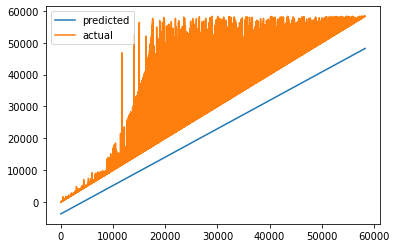

In [154]:
visualize_prediction(predict(reg_model, X), y, "song_prediction.svg")

In [155]:
def normpdf(x, mean, sd): #true_y, pred_y (mean), std
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

In [156]:
len(df)

58290

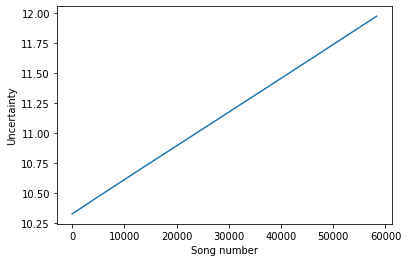

In [157]:
reg_y_test = np.array(list(range(len(df))))
means, stds = predict(reg_model, reg_y_test)
unc = []
for i in range(len(means)):
    p = normpdf(df['Song'][i], means[i], stds[i]) 
    nll = -np.log(p)
    unc.append(nll)
plt.plot(unc)
plt.xlabel('Song number')
plt.ylabel('Uncertainty')
plt.show()

In [158]:
means[0]

-3705.3535

In [159]:
def plot_uncertainty_pop(popuarity, uncertainty):
    id, counts = zip(*popuarity.items())
    plot_dict = {}
    i = 0
    for num in counts:
        #what if its already a number
        plot_dict[num] = uncertainty[i]
        i += 1
    pop, unc = zip(*plot_dict.items())
    print(scipy.stats.pearsonr(pop, unc))
    print(scipy.stats.spearmanr(pop, unc))
    print(scipy.stats.kendalltau(pop, unc))
    plt.scatter(pop, unc)
    plt.xlabel("Popuarity")
    plt.ylabel("Uncertainty")
    plt.show() #BREAK POINT HERE TO SEE THE PLOT

(-0.8664628417622384, 2.7805736136948704e-21)
SpearmanrResult(correlation=-0.9702290685609388, pvalue=9.475082899961116e-42)
KendalltauResult(correlation=-0.8606965174129355, pvalue=7.184603488205046e-25)


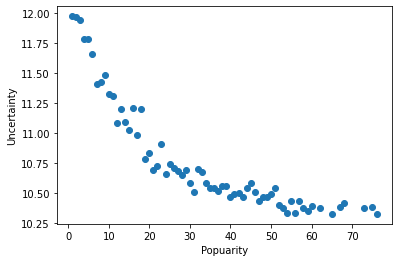

In [160]:
plot_uncertainty_pop(popularity, unc)